<a href="https://colab.research.google.com/github/davidsonsantana89/RNA-e-Deep-Learning---CESAR-School-2023.02/blob/main/Atividade%20Aula%202.6/dass_2_6_LinearRegressionIrisOptimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAVIDSON ALVES SANTOS DE SANTANA

dass@cesar.school

# Regressão Linear com PyTorch

## Objetivos

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se:
- a função de perda MSE do PyTorch,
- treinamento dos parâmetros via gradiente descendente usando o otimizador.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [1]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [3]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [4]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [5]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

## Criação do modelo da rede

In [13]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [14]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform_(model.weight.data, -0.1, 0.1)
model.weight.data

tensor([[0.0550, 0.0642]])

### Testando o predict da rede

In [15]:
model(Variable(torch.ones((5,2))))

tensor([[0.1191],
        [0.1191],
        [0.1191],
        [0.1191],
        [0.1191]], grad_fn=<MmBackward0>)

In [18]:
model(x_train_bias)

tensor([[0.1191],
        [0.1008],
        [0.1161],
        [0.0733],
        [0.1039],
        [0.0794],
        [0.0977],
        [0.0550],
        [0.1069],
        [0.0641],
        [0.0580],
        [0.0855],
        [0.0886],
        [0.0916],
        [0.0764],
        [0.1100],
        [0.0764],
        [0.0825],
        [0.0947],
        [0.0764],
        [0.0855],
        [0.0916],
        [0.0977],
        [0.0916],
        [0.1008],
        [0.1069],
        [0.1130],
        [0.1100],
        [0.0886],
        [0.0794],
        [0.0733],
        [0.0733],
        [0.0825],
        [0.0886],
        [0.0702],
        [0.0886],
        [0.1100],
        [0.0977],
        [0.0764],
        [0.0733],
        [0.0733],
        [0.0916],
        [0.0825],
        [0.0580],
        [0.0764],
        [0.0794],
        [0.0794],
        [0.0947],
        [0.0611],
        [0.0794]], grad_fn=<MmBackward0>)

## Treinamento

### Definindo função de perda e otimizador

In [19]:
criterion = nn.MSELoss() # implementação do PyTorch para o cálculo do Loss
optimizer = optim.SGD(model.parameters(), lr=0.3)

### Laço de treinamento

In [20]:
num_epochs = 120
w0_list = []
w1_list = []
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    out = model(inputs)

    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())

    #loss cálculo da função de perda
    loss = criterion(out, target)

    # backward e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/120], loss: 0.024489
Epoch[40/120], loss: 0.022222
Epoch[60/120], loss: 0.021503
Epoch[80/120], loss: 0.021275
Epoch[100/120], loss: 0.021203
Epoch[120/120], loss: 0.021180


## Avaliação

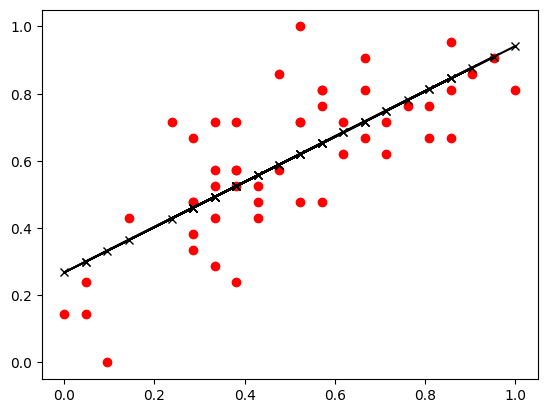

In [21]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

# Exercícios

- 1) Calcule o valor da função de custo (MSE) depois da rede treinada, utilizando a
   função `criterion` utilizada no laço de treinamento.

In [23]:
#todo
pred = model(x_train_bias)
loss = criterion(pred, y_train)
loss

tensor(0.0212, grad_fn=<MseLossBackward0>)

<details>
<summary>Mostrar Resultado</summary>

```python
y_pred = model(Variable(x_train_bias))
loss = criterion(y_pred, Variable(y_train))
print(loss)
```

</details>

- 2) Faça igual o exercício do notebook anterior, de plotar um gráfico scatterplot para
   mostrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente.

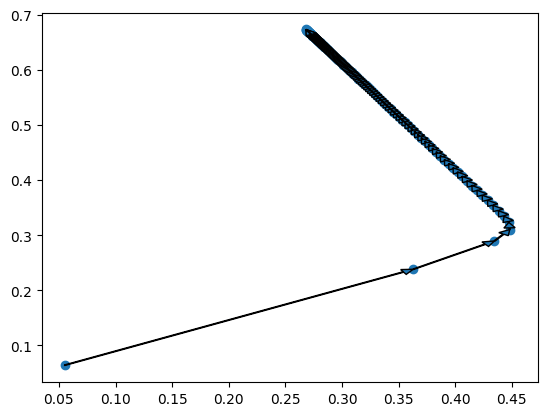

In [24]:
# todo
plt.scatter(w0_list, w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

<details>
<summary>Mostrar Resultado</summary>

```python
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1
```

</details>

# Aprendizados